# KF6 - Gamma Spectroscopy


## Table of Content

* [Read experimental data from file](#read)
    * [Loading spectra taken by NaI(Tl) detector](#read_na)
    * [Loading spectra taken by HPGe detector ](#read_ge)

* [Analyzing the data](#fit)
    * [Task 1: Main features of $\gamma$-spectra](#features)
    * [Task 2: Energy calibration of the NaI(Tl) and HPGe detectors](#calibration)
    * [Task 3: Full width at half maximum (FWHM) as a function of a $\gamma$-ray energy](#fwhm)
    * [Task 4: $^{22}$Na $\gamma$-spectrum and relative peak intensity](#na22)
    * [Task 5: $^{137}$Cs and the internal conversion coefficient of $^{137}$Ba](#internal)
    * [Task 6: Binding energy of the deuteron](#deuteron)
    * [Task 7: Background radiation ](#background)

### Importing python packages <a name="import"></a>

In [172]:
#This code cell holds useful code needed for the analysis. Execute it like normal.
# Packages to help importing files 
import sys, os
sys.path.append('./lib')

# Package that supports working with large arrays
import numpy as np  

# Package for plotting 
import matplotlib   # choose a backend for web applications; remove for stand-alone applications:
matplotlib.use('Agg') # enable interactive notebook plots (alternative: use 'inline' instead of 'notebook'/'widget' for static images)
%matplotlib notebook

# The following line is the ONLY one needed in stand-alone applications!
import matplotlib.pyplot as plt

# Function that fits a curve to data 
from scipy.optimize import curve_fit

# Custom pakages prepared for you to analyze experimental data from labs.
# The code is located in the 'lib' subfolder which we have to specify:
sys.path.append('./lib')
import MCA, fittingFunctions

----------------------------------------------------------------------------------------------------------

# Reading experimental data <a name="read"></a>

## Loading spectra taken by NaI(Tl) detector <a name="read_na"></a>

With the help of the function `load_spectrum` from package `MCA` one can read the experimental data from one data file as follows:

In [215]:
#Load your data files here:
Co60_NaI  = MCA.load_spectrum("Gamma-200930-NaI/Co60.Spe")
Cs137_NaI = MCA.load_spectrum("Gamma-200930-NaI/Cs137.Spe")
Na22_NaI  = MCA.load_spectrum("Gamma-200930-NaI/Na22.Spe")
Th232_NaI = MCA.load_spectrum("Gamma-200930-NaI/Th232salt.Spe")
Cs137Y_NaI = MCA.load_spectrum("Gamma-200930-NaI/cs_amp.Spe")


## Loading spectra taken by HPGe detector <a name="read_ge"></a>

In [174]:
#Load your data files here:
Co60_Ge  = MCA.load_spectrum("GammaLab30sepGe/Co60.Spe")
Cs137_Ge = MCA.load_spectrum("GammaLab30sepGe/Cs137.Spe")
Na22_Ge  = MCA.load_spectrum("GammaLab30sepGe/Na22.Spe")
Th232_Ge = MCA.load_spectrum("GammaLab30sepGe/Th232Salt.Spe")
Cf252_Ge = MCA.load_spectrum("GammaLab30sepGe/Cf252toD.Spe")

----------------------------------------------------------------------------------------------------------

# Analyzing the data <a name="fit"></a>

Many help functions have been implemented to help you analyze the data from the lab and the code is stored in [MCA.py](./lib/MCA.py) and [fittingFunctions.py](./lib/fittingFunctions.py). Run [Intro_notebook.ipynb](./Intro_notebook.ipynb) to see loads of examples on how to use the code that we implemented for you for analyzing your data from the gamma lab. Feel free to copy paste cells from the notebook and use them for your analysis.

## Task 1: Main features of $\gamma$-spectra <a name="features"></a>

<IPython.core.display.Javascript object>


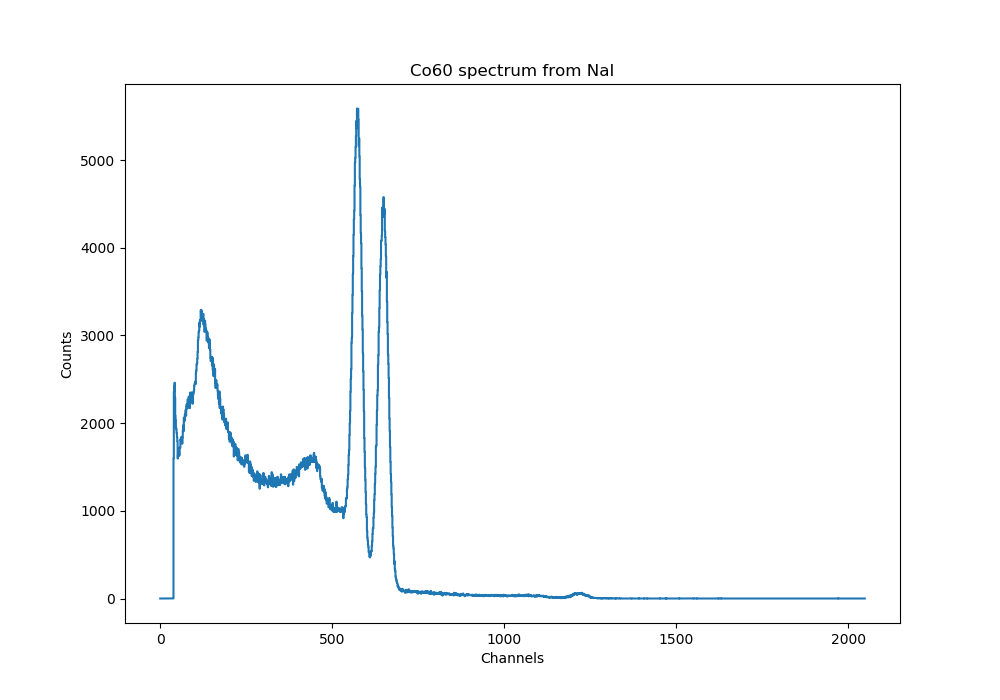

<IPython.core.display.Javascript object>


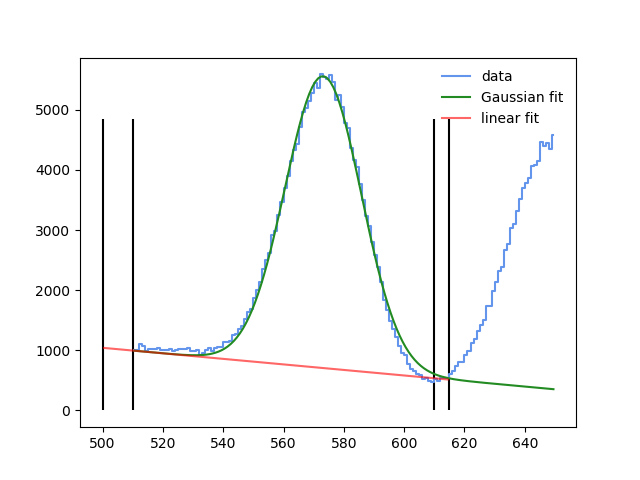

Estimated parameters:
 A = 4853.65411, mu = 573.16440,  sigma = 12.66501 

Uncertainties in the estimated parameters: 
 σ²(A) = 108965.12261, σ²(mu) = 0.98922, σ²(sigma) = 0.98922 

Covariance matrix: 
 [[ 1.08965123e+05  1.27447589e-04 -1.89552579e+02]
 [ 1.27447589e-04  9.89220578e-01 -3.32544603e-07]
 [-1.89552579e+02 -3.32544603e-07  9.89220583e-01]]


<IPython.core.display.Javascript object>


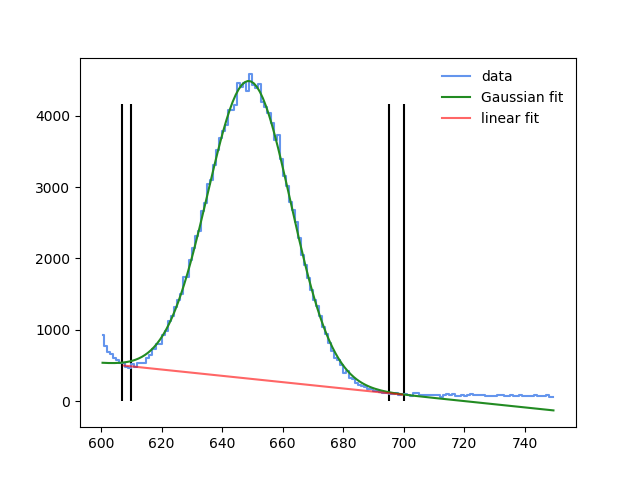

Estimated parameters:
 A = 4169.82798, mu = 648.95284,  sigma = 13.72924 

Uncertainties in the estimated parameters: 
 σ²(A) = 513.11724, σ²(mu) = 0.00742, σ²(sigma) = 0.00742 

Covariance matrix: 
 [[ 5.13117241e+02  2.39473088e-05 -1.12635515e+00]
 [ 2.39473088e-05  7.41658509e-03 -1.67546449e-07]
 [-1.12635515e+00 -1.67546449e-07  7.41712923e-03]]
Varibles stored in Co60peak1NaI: A=4853.65411, mu=573.16440 and sigma=12.66501
Estimated parameters:
 A = 4853.65411, mu = 573.16440,  sigma = 12.66501 

Uncertainties in the estimated parameters: 
 σ²(A) = 108965.12261, σ²(mu) = 0.98922, σ²(sigma) = 0.98922 

Covariance matrix: 
 [[ 1.08965123e+05  1.27447589e-04 -1.89552579e+02]
 [ 1.27447589e-04  9.89220578e-01 -3.32544603e-07]
 [-1.89552579e+02 -3.32544603e-07  9.89220583e-01]]
Varibles stored in Co60peak2NaI: A=4169.82798, mu=648.95284 and sigma=13.72924
Estimated parameters:
 A = 4853.65411, mu = 573.16440,  sigma = 12.66501 

Uncertainties in the estimated parameters: 
 σ²(A) = 108

In [175]:
def GaussFunc(x, A, mu, sigma):
    return A*np.exp(-(x-mu)**2/(2.*sigma**2))

def LineFunc(x, k, m):
    return k*x+m

plt.figure(figsize=(10,7))
# with the data read in with the first routine
plt.step(Co60_NaI.bin_centers, Co60_NaI.counts, where='mid')

plt.title("Co60 spectrum from NaI") # set title of the plot
plt.xlabel("Channels")     # set label for x-axis 
plt.ylabel("Counts")       # set label for y-axis 
#plt.savefig("test_spectrum.png") # This is how you save the figure. Change the extension for different file types such as pdf or png.


Co60Peak1NaI = fittingFunctions.perform_Gaussian_fit(x = Co60_NaI.bin_centers, 
                                              y = Co60_NaI.counts,
                                              # region to use
                                              region_start = 510, 
                                              region_stop = 650,
                                              # initial guesses
                                              mu_guess = 574, 
                                              A_guess = 5600, 
                                              sigma_guess = 2,
                                              # regions for linear background fitting/subtraction:
                                              left_selection = [500, 510], 
                                              right_selection = [610, 615]) 





Co60Peak2NaI = fittingFunctions.perform_Gaussian_fit(x = Co60_NaI.bin_centers, 
                                              y = Co60_NaI.counts,
                                              # region to use
                                              region_start = 600, 
                                              region_stop = 750 ,
                                              # initial guesses
                                              mu_guess = 650, 
                                              A_guess = 4500, 
                                              sigma_guess = 2,
                                              # regions for linear background fitting/subtraction:
                                              left_selection = [607, 610], 
                                              right_selection = [695, 700]) 


print("Varibles stored in Co60peak1NaI: A={:.5f}, mu={:.5f} and sigma={:.5f}".format(Co60Peak1NaI.A, Co60Peak1NaI.mu, Co60Peak1NaI.sigma))

Co60Peak1NaI.print_full_info()

print("Varibles stored in Co60peak2NaI: A={:.5f}, mu={:.5f} and sigma={:.5f}".format(Co60Peak2NaI.A, Co60Peak2NaI.mu, Co60Peak2NaI.sigma))

Co60Peak1NaI.print_full_info()




#getting peak intensities
AreaCo60P1NaI = np.sqrt(2*np.pi)*Co60Peak1NaI.A*np.abs(Co60Peak1NaI.sigma)
print('Area of the first peak in Co60 from NaI is {:.2f}'.format(AreaCo60P1NaI))

AreaCo60P2NaI = np.sqrt(2*np.pi)*Co60Peak2NaI.A*np.abs(Co60Peak2NaI.sigma)
print('Area of the second peak in Co60 from NaI is {:.2f}'.format(AreaCo60P2NaI))

#AreaCs137P1NaI = np.sqrt(2*np.pi)*Cs137Peak1NaI.A*np.abs(Cs137Peak1NaI.sigma)
#print('Area of the first peak in Cs137 from NaI is {:.2f}'.format(AreaCs137P1NaI))








<IPython.core.display.Javascript object>


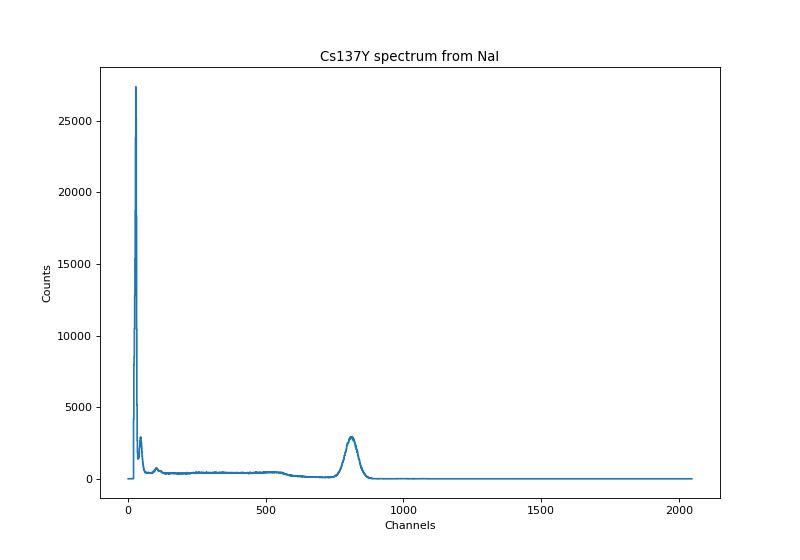

C:\Users\DECENT COMPUTER\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


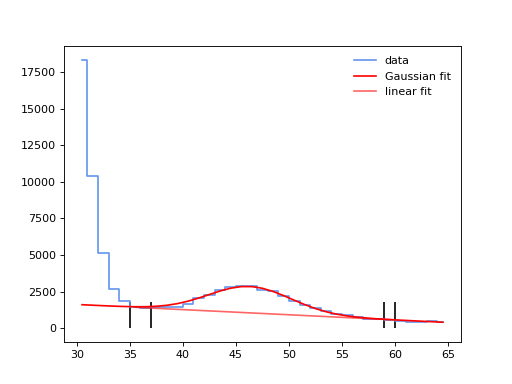

Estimated parameters:
 A = 1802.28962, mu = 46.30791,  sigma = 3.90045 

Uncertainties in the estimated parameters: 
 σ²(A) = 2529912.50017, σ²(mu) = 15.78171, σ²(sigma) = 15.78172 

Covariance matrix: 
 [[ 2.52991250e+06  1.40329352e-03 -3.64812260e+03]
 [ 1.40329352e-03  1.57817079e+01 -4.88335494e-06]
 [-3.64812260e+03 -4.88335494e-06  1.57817214e+01]]
Varibles stored in Cs137Ypeak1NaI: A=1802.28962, mu=46.30791 and sigma=3.90045
Estimated parameters:
 A = 1802.28962, mu = 46.30791,  sigma = 3.90045 

Uncertainties in the estimated parameters: 
 σ²(A) = 2529912.50017, σ²(mu) = 15.78171, σ²(sigma) = 15.78172 

Covariance matrix: 
 [[ 2.52991250e+06  1.40329352e-03 -3.64812260e+03]
 [ 1.40329352e-03  1.57817079e+01 -4.88335494e-06]
 [-3.64812260e+03 -4.88335494e-06  1.57817214e+01]]


C:\Users\DECENT COMPUTER\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


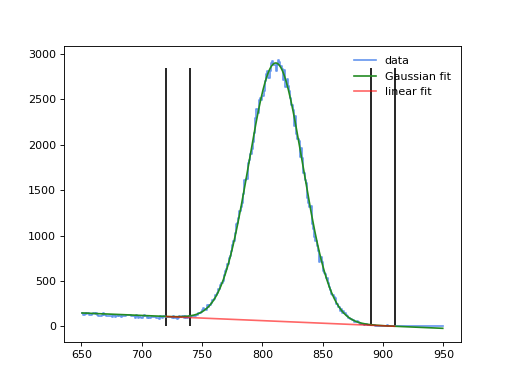

Estimated parameters:
 A = 2842.04475, mu = 811.13987,  sigma = 22.42979 

Uncertainties in the estimated parameters: 
 σ²(A) = 28.46655, σ²(mu) = 0.00236, σ²(sigma) = 0.00236 

Covariance matrix: 
 [[ 2.84665450e+01  8.05371684e-08 -1.49774684e-01]
 [ 8.05371684e-08  2.36408626e-03 -6.38205551e-10]
 [-1.49774684e-01 -6.38205551e-10  2.36408627e-03]]
Varibles stored in Cs137Ypeak1NaI: A=2842.04475, mu=811.13987 and sigma=22.42979
Estimated parameters:
 A = 2842.04475, mu = 811.13987,  sigma = 22.42979 

Uncertainties in the estimated parameters: 
 σ²(A) = 28.46655, σ²(mu) = 0.00236, σ²(sigma) = 0.00236 

Covariance matrix: 
 [[ 2.84665450e+01  8.05371684e-08 -1.49774684e-01]
 [ 8.05371684e-08  2.36408626e-03 -6.38205551e-10]
 [-1.49774684e-01 -6.38205551e-10  2.36408627e-03]]


In [219]:
#Cs_amp 137

plt.figure(figsize=(10,7))
# with the data read in with the first routine
plt.step(Cs137Y_NaI.bin_centers, Cs137Y_NaI.counts, where='mid')

plt.title("Cs137Y spectrum from NaI") # set title of the plot
plt.xlabel("Channels")     # set label for x-axis 
plt.ylabel("Counts")       # set label for y-axis 
#plt.savefig("test_spectrum.png") # This is how you save the figure. Change the extension for different file types such as pdf or png.


Cs137YPeak1NaI = fittingFunctions.perform_Gaussian_fit(x = Cs137Y_NaI.bin_centers, 
                                              y = Cs137Y_NaI.counts,
                                              # region to use
                                              region_start = 30, 
                                              region_stop = 65 ,
                                              # initial guesses
                                              mu_guess = 45, 
                                              A_guess = 3000, 
                                              sigma_guess = 2,
                                              # regions for linear background fitting/subtraction:
                                              left_selection = [35, 37], 
                                              right_selection = [59, 60]) 


print("Varibles stored in Cs137Ypeak1NaI: A={:.5f}, mu={:.5f} and sigma={:.5f}".format(Cs137YPeak1NaI.A, Cs137YPeak1NaI.mu, Cs137YPeak1NaI.sigma))

Cs137YPeak1NaI.print_full_info()


Cs137YPeak2NaI = fittingFunctions.perform_Gaussian_fit(x = Cs137Y_NaI.bin_centers, 
                                              y = Cs137Y_NaI.counts,
                                              # region to use
                                              region_start = 650, 
                                              region_stop = 950 ,
                                              # initial guesses
                                              mu_guess = 810, 
                                              A_guess = 3000, 
                                              sigma_guess = 2,
                                              # regions for linear background fitting/subtraction:
                                              left_selection = [720, 740], 
                                              right_selection = [890, 910]) 


print("Varibles stored in Cs137Ypeak1NaI: A={:.5f}, mu={:.5f} and sigma={:.5f}".format(Cs137YPeak2NaI.A, Cs137YPeak2NaI.mu, Cs137YPeak2NaI.sigma))

Cs137YPeak2NaI.print_full_info()


In [232]:
AreaXray = np.sqrt(2*np.pi)*Cs137YPeak1NaI.A*np.abs(Cs137YPeak1NaI.sigma)
print('Area of the first peak in CS137Y from NaI is {:.2f}'.format(AreaXray))

AreaYray = np.sqrt(2*np.pi)*Cs137YPeak2NaI.A*np.abs(Cs137YPeak2NaI.sigma)
print('Area of the second peak in CS137Y from NaI is {:.2f}'.format(AreaYray))

omega= 0.895 # 2%

alpha=(AreaXray*0.3)/(AreaYray*omega*0.9)

print(alpha)


Area of the first peak in CS137Y from NaI is 17620.97
Area of the second peak in CS137Y from NaI is 159788.73
0.04107137703650206


In [230]:
#uncertainty for Task 5
px=Cs137YPeak1NaI.A*0.15
py=Cs137YPeak2NaI.A*0.15
Ax=Cs137YPeak1NaI.A
Ay=Cs137YPeak2NaI.A

#sx=np.sqrt(Cs137YPeak1NaI.covar_matrix[2][2])
sy=np.sqrt(Cs137YPeak2NaI.covar_matrix[2][2])

relAlpha=np.sqrt((px/Ax)**2+(py/Ay)**2+(0.02)**2+(0.015/Cs137YPeak1NaI.sigma)**2+(sy/Cs137YPeak2NaI.sigma)**2+(0.02)**2)

#s5=np.sqrt(Na22Peak1NaI.covar_matrix[2][2])
#s12=np.sqrt(Na22Peak2NaI.covar_matrix[2][2])


erralpha=alpha*relAlpha

print( erralpha, relAlpha, sx)


0.008791528383837802 0.21405487271645066 3.9726214813675607


<IPython.core.display.Javascript object>


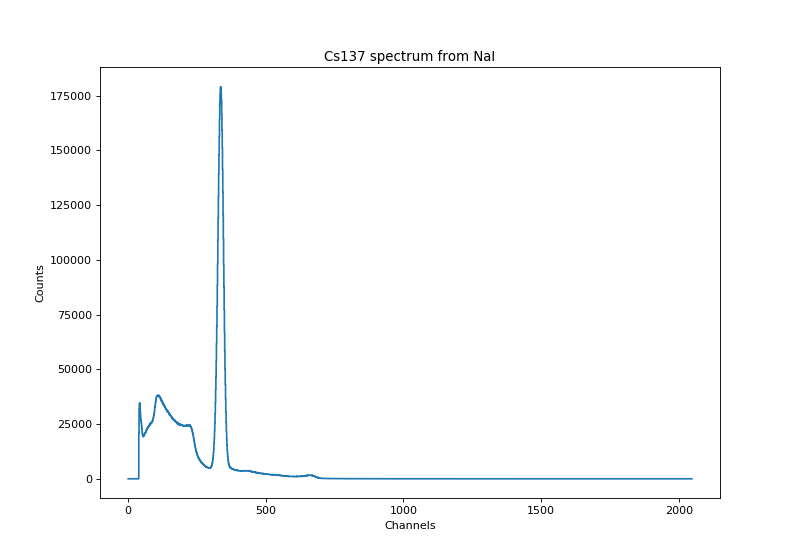

<IPython.core.display.Javascript object>


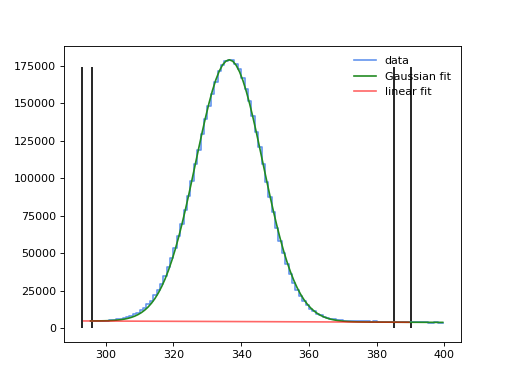

Estimated parameters:
 A = 174364.73628, mu = 336.46752,  sigma = 9.92548 

Uncertainties in the estimated parameters: 
 σ²(A) = 90632.98615, σ²(mu) = 0.00039, σ²(sigma) = 0.00039 

Covariance matrix: 
 [[ 9.06329861e+04  2.58432051e-06 -3.43945688e+00]
 [ 2.58432051e-06  3.91574122e-04 -2.00700214e-10]
 [-3.43945688e+00 -2.00700214e-10  3.91574529e-04]]
Varibles stored in Cs137peak1NaI: A=174364.73628, mu=336.46752 and sigma=9.92548
Estimated parameters:
 A = 174364.73628, mu = 336.46752,  sigma = 9.92548 

Uncertainties in the estimated parameters: 
 σ²(A) = 90632.98615, σ²(mu) = 0.00039, σ²(sigma) = 0.00039 

Covariance matrix: 
 [[ 9.06329861e+04  2.58432051e-06 -3.43945688e+00]
 [ 2.58432051e-06  3.91574122e-04 -2.00700214e-10]
 [-3.43945688e+00 -2.00700214e-10  3.91574529e-04]]


In [192]:
#Cs137

plt.figure(figsize=(10,7))
# with the data read in with the first routine
plt.step(Cs137_NaI.bin_centers, Cs137_NaI.counts, where='mid')

plt.title("Cs137 spectrum from NaI") # set title of the plot
plt.xlabel("Channels")     # set label for x-axis 
plt.ylabel("Counts")       # set label for y-axis 
#plt.savefig("test_spectrum.png") # This is how you save the figure. Change the extension for different file types such as pdf or png.


Cs137Peak1NaI = fittingFunctions.perform_Gaussian_fit(x = Cs137_NaI.bin_centers, 
                                              y = Cs137_NaI.counts,
                                              # region to use
                                              region_start = 295, 
                                              region_stop = 400,
                                              # initial guesses
                                              mu_guess = 336, 
                                              A_guess = 175000, 
                                              sigma_guess = 2,
                                              # regions for linear background fitting/subtraction:
                                              left_selection = [293, 296], 
                                              right_selection = [385, 390]) 


print("Varibles stored in Cs137peak1NaI: A={:.5f}, mu={:.5f} and sigma={:.5f}".format(Cs137Peak1NaI.A, Cs137Peak1NaI.mu, Cs137Peak1NaI.sigma))

Cs137Peak1NaI.print_full_info()


<IPython.core.display.Javascript object>


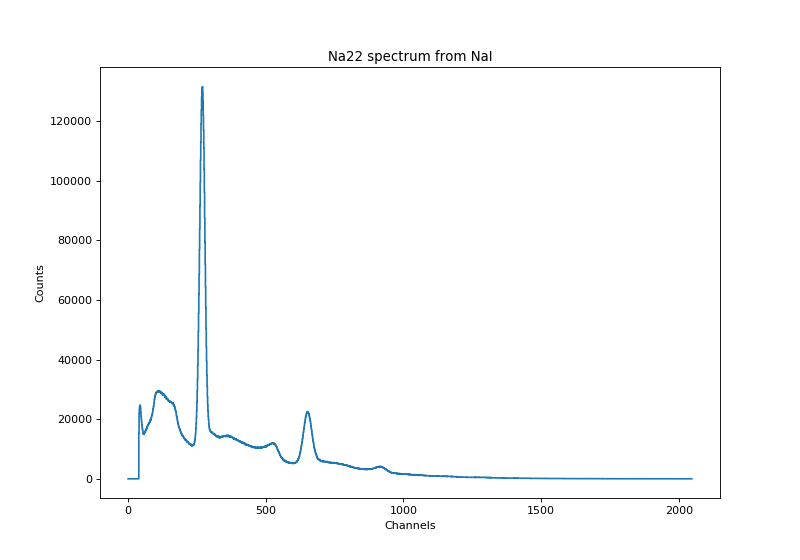

<IPython.core.display.Javascript object>


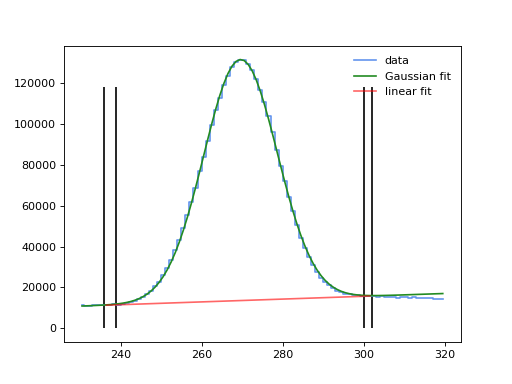

Estimated parameters:
 A = 118061.12253, mu = 269.60276,  sigma = 9.09075 

Uncertainties in the estimated parameters: 
 σ²(A) = 77737.37684, σ²(mu) = 0.00061, σ²(sigma) = 0.00061 

Covariance matrix: 
 [[ 7.77373768e+04  1.99617431e-06 -3.99053991e+00]
 [ 1.99617431e-06  6.14546170e-04 -1.73234745e-10]
 [-3.99053991e+00 -1.73234745e-10  6.14546322e-04]]


<IPython.core.display.Javascript object>


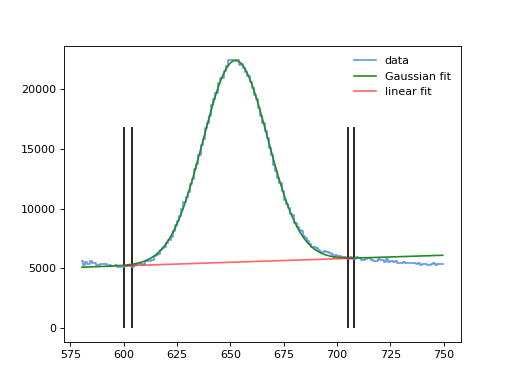

Estimated parameters:
 A = 16849.96022, mu = 652.33384,  sigma = 15.21681 

Uncertainties in the estimated parameters: 
 σ²(A) = 4640.21376, σ²(mu) = 0.00505, σ²(sigma) = 0.00505 

Covariance matrix: 
 [[ 4.64021376e+03  1.79241044e-06 -2.79366556e+00]
 [ 1.79241044e-06  5.04582389e-03 -1.62603898e-09]
 [-2.79366556e+00 -1.62603898e-09  5.04582401e-03]]
Varibles stored in Na22peak1NaI: A=118061.12253, mu=269.60276 and sigma=9.09075
Estimated parameters:
 A = 118061.12253, mu = 269.60276,  sigma = 9.09075 

Uncertainties in the estimated parameters: 
 σ²(A) = 77737.37684, σ²(mu) = 0.00061, σ²(sigma) = 0.00061 

Covariance matrix: 
 [[ 7.77373768e+04  1.99617431e-06 -3.99053991e+00]
 [ 1.99617431e-06  6.14546170e-04 -1.73234745e-10]
 [-3.99053991e+00 -1.73234745e-10  6.14546322e-04]]
Varibles stored in Na22peak2NaI: A=16849.96022, mu=652.33384 and sigma=15.21681
Estimated parameters:
 A = 16849.96022, mu = 652.33384,  sigma = 15.21681 

Uncertainties in the estimated parameters: 
 σ²(A) 

In [183]:
### Na22NaI

plt.figure(figsize=(10,7))
# with the data read in with the first routine
plt.step(Na22_NaI.bin_centers, Na22_NaI.counts, where='mid')

plt.title("Na22 spectrum from NaI") # set title of the plot
plt.xlabel("Channels")     # set label for x-axis 
plt.ylabel("Counts")       # set label for y-axis 
#plt.savefig("test_spectrum.png") # This is how you save the figure. Change the extension for different file types such as pdf or png.


Na22Peak1NaI = fittingFunctions.perform_Gaussian_fit(x = Na22_NaI.bin_centers, 
                                              y = Na22_NaI.counts,
                                              # region to use
                                              region_start = 230, 
                                              region_stop = 320,
                                              # initial guesses
                                              mu_guess = 270, 
                                              A_guess = 130000, 
                                              sigma_guess = 2,
                                              # regions for linear background fitting/subtraction:
                                              left_selection = [236, 239], 
                                              right_selection = [300, 302]) 





Na22Peak2NaI = fittingFunctions.perform_Gaussian_fit(x = Na22_NaI.bin_centers, 
                                              y = Na22_NaI.counts,
                                              # region to use
                                              region_start = 580, 
                                              region_stop = 750 ,
                                              # initial guesses
                                              mu_guess = 650, 
                                              A_guess = 230000, 
                                              sigma_guess = 2,
                                              # regions for linear background fitting/subtraction:
                                              left_selection = [600, 604], 
                                              right_selection = [705, 708]) 


print("Varibles stored in Na22peak1NaI: A={:.5f}, mu={:.5f} and sigma={:.5f}".format(Na22Peak1NaI.A, Na22Peak1NaI.mu, Na22Peak1NaI.sigma))

Na22Peak1NaI.print_full_info()

print("Varibles stored in Na22peak2NaI: A={:.5f}, mu={:.5f} and sigma={:.5f}".format(Na22Peak2NaI.A, Na22Peak2NaI.mu, Na22Peak2NaI.sigma))

Na22Peak2NaI.print_full_info()


In [184]:
### your code goes here 
AreaNa22P1NaI = np.sqrt(2*np.pi)*Na22Peak1NaI.A*np.abs(Na22Peak1NaI.sigma)
print('Area of the first peak in Na22 from NaI is {:.2f}'.format(AreaNa22P1NaI))

AreaNa22P2NaI = np.sqrt(2*np.pi)*Na22Peak2NaI.A*np.abs(Na22Peak2NaI.sigma)
print('Area of the second peak in Na22 from NaI is {:.2f}'.format(AreaNa22P2NaI))

epbT5=0.58
epbT12=0.33
u5=0.04
u12=0.035
x=0.0762 #for both assumed
eeff5=(1-np.exp(-u5*0.0762))
eeff12=(1-np.exp(-u12*0.0762))

ratio512=(AreaNa22P1NaI* epbT12 *eeff12)/(AreaNa22P2NaI*epbT5*eeff5)

print(ratio512)

#error propagation

#someerror = np.array([f*Co60Peak1Ge.covar_matrix[2][2]*k+m, f*Co60Peak2Ge.covar_matrix[2][2]*k+m, f*Cs137Peak1Ge.covar_matrix[2][2]*k+m, f*Na22Peak1Ge.covar_matrix[2][2]*k+m, f*Na22Peak2Ge.covar_matrix[2][2]*k+m])

s5=Na22Peak1NaI.covar_matrix[2][2]
s12=Na22Peak2NaI.covar_matrix[2][2]
A5=Na22Peak1NaI.covar_matrix[0][0]
A12=Na22Peak2NaI.covar_matrix[0][0]

relI5=(A5/Na22Peak1NaI.A)+(s5/Na22Peak1NaI.sigma)
relI12=(A12/Na22Peak2NaI.A)+(s5/Na22Peak1NaI.sigma)

relmux5=(0.001/0.04)+(0.0762/2)/0.0762
relmux12=(0.001/0.035)+(0.0762/2)/0.0762

errmux5=(u5*x)*relmux5
errmux12=(u12*x)*relmux12

erreff5=1-np.exp(-errmux5)
erreff12= 1 -np.exp(-errmux12)

releff5=erreff5/eeff5
releff12= erreff12/eeff12

relepbt5=0.01/epbT5
relepbt12=0.01/epbT12

relratio=relI5+relI12+releff5+releff12+relepbt5+relepbt12

print(relratio)

errratio=ratio512*relratio
print(errratio, s5, s12, relI5, relI12, relmux5, relmux12, relepbt5, relI5, releff5)
print(releff5)

Area of the first peak in Na22 from NaI is 2690273.14
Area of the second peak in Na22 from NaI is 642705.96
2.0843024729292976
2.03579787296395
4.243218541002965 0.0006145463217475957 0.005045824008082019 0.6585178614281987 0.27545185763811403 0.525 0.5285714285714286 0.01724137931034483 0.6585178614281987 0.5253800377734139
0.5253800377734139


Estimates of k = 2.08 and  m = -42.79


<IPython.core.display.Javascript object>


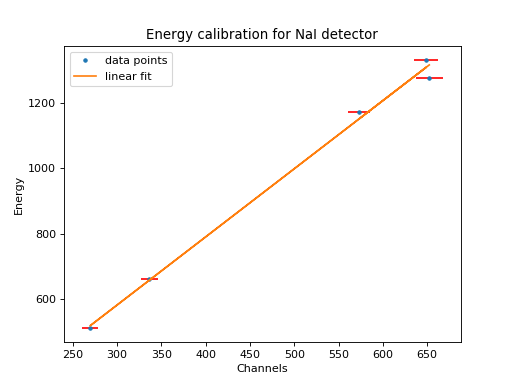

[1173.228 1332.492  661.7    511.    1274.5  ]
[573.16440129 648.95283606 336.46752231 269.60275691 652.33384492]
[12.66500666 13.72923936  9.92548392  9.09074621 15.21680626]


In [185]:
#Calibration of NaI
# we define the table energies as Numpy arrays, as these are easier to use in calculations than lists:
energy = np.array([1173.228, 1332.492, 661.7, 511, 1274.5])
channels = np.array([Co60Peak1NaI.mu, Co60Peak2NaI.mu, Cs137Peak1NaI.mu, Na22Peak1NaI.mu, Na22Peak2NaI.mu])
channelerror = np.array([Co60Peak1NaI.sigma, Co60Peak2NaI.sigma, Cs137Peak1NaI.sigma, Na22Peak1NaI.sigma, Na22Peak2NaI.sigma])
#channelerror = np.array([Co60Peak1NaI.covar_matrix[1][1], Co60Peak2NaI.covar_matrix[1][1], Cs137Peak1NaI.covar_matrix[1][1], Na22Peak1NaI.covar_matrix[1][1], Na22Peak2NaI.covar_matrix[1][1]])


### 1. define the data to fit
# see energy and channels in the cells above

### 2. the function
def LineFunc(x, k, m):
    return k*x+m

### 3. our intial guess 
guess = [2, # k
         1] # m

### 4. now we can perform the fit using curve_fit:
estimates, covar_matrix = curve_fit(LineFunc,
                                    channels,
                                    energy,
                                    p0 = guess)

k = estimates[0] # unpack our values 
m = estimates[1] # unpack our values 

print("Estimates of k = {:.2f} and  m = {:.2f}".format(k, m))

### Plot your Gaussian fit
plt.figure()
#plt.plot(channels, energy, linestyle="", marker="", label='data points')
plt.plot(channels, energy, linestyle="", marker=".", label='data points')
plt.plot(channels, LineFunc(channels, k, m), label='linear fit')
plt.errorbar(channels, energy, xerr=channelerror, fmt='none', ecolor='red')
plt.legend(loc='upper left')
plt.title("Energy calibration for NaI detector") # set title of the plot
plt.xlabel("Channels")     # set label for x-axis 
plt.ylabel("Energy")       # set label for y-axis 
plt.show()

print(energy)
print(channels)
print(channelerror)


<IPython.core.display.Javascript object>


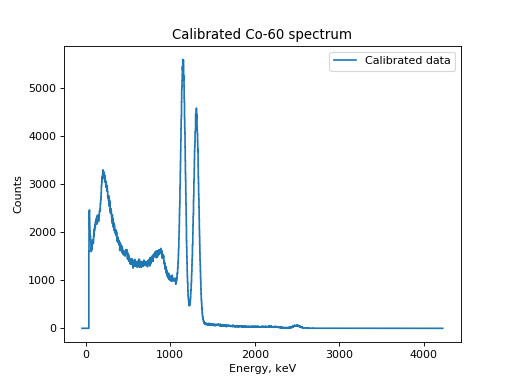

In [124]:
#Apply Calibration
Co60_NaI.calibrate(k, m) ### which means data.energy = data.bin_centers * k + m ,data= Co60_NaI

plt.figure()
# with the data read in with the first routine
plt.step(Co60_NaI.energy, Co60_NaI.counts, where='mid', label='Calibrated data')

plt.title("Calibrated Co-60 spectrum") # set title of the plot
plt.xlabel("Energy, keV")     # set label for x-axis 
plt.ylabel("Counts")          # set label for y-axis 
plt.legend()                  # enables legend for all plots with a 'label'
#plt.savefig("test_spectrum.png")

<IPython.core.display.Javascript object>


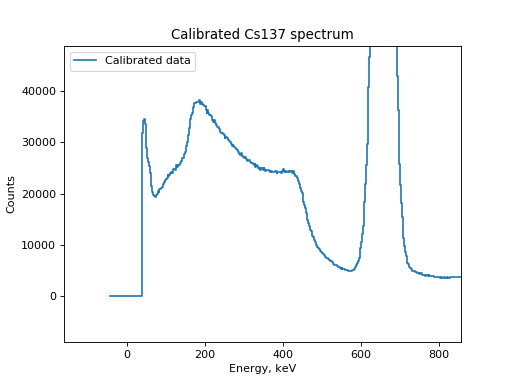

In [186]:
Cs137_NaI.calibrate(k, m) ### which means data.energy = data.bin_centers * k + m ,data= Co60_NaI

plt.figure()
# with the data read in with the first routine
plt.step(Cs137_NaI.energy, Cs137_NaI.counts, where='mid', label='Calibrated data')

plt.title("Calibrated Cs137 spectrum") # set title of the plot
plt.xlabel("Energy, keV")     # set label for x-axis 
plt.ylabel("Counts")          # set label for y-axis 
plt.legend()                  # enables legend for all plots with a 'label'
#plt.savefig("test_spectrum.png")

<IPython.core.display.Javascript object>


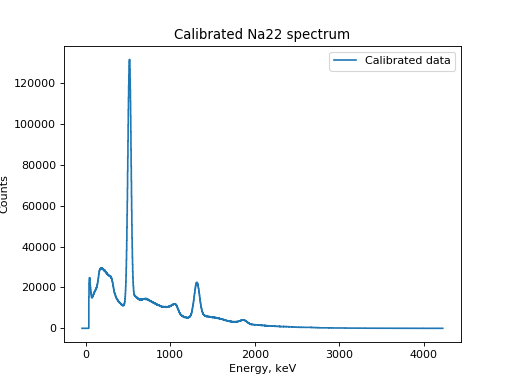

In [125]:
Na22_NaI.calibrate(k, m) ### which means data.energy = data.bin_centers * k + m ,data= Co60_NaI

plt.figure()
# with the data read in with the first routine
plt.step(Na22_NaI.energy, Na22_NaI.counts, where='mid', label='Calibrated data')

plt.title("Calibrated Na22 spectrum") # set title of the plot
plt.xlabel("Energy, keV")     # set label for x-axis 
plt.ylabel("Counts")          # set label for y-axis 
plt.legend()                  # enables legend for all plots with a 'label'
#plt.savefig("test_spectrum.png")

<IPython.core.display.Javascript object>


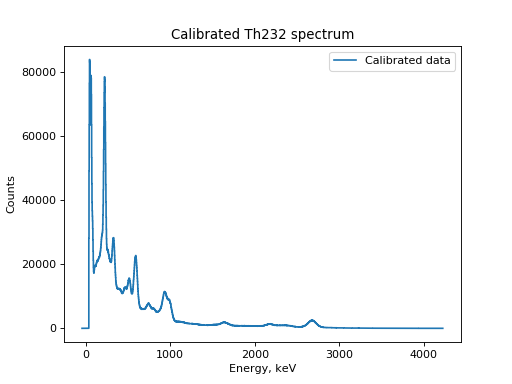

In [44]:
Th232_NaI.calibrate(k, m) ### which means data.energy = data.bin_centers * k + m ,data= Co60_NaI

plt.figure()
# with the data read in with the first routine
plt.step(Th232_NaI.energy, Th232_NaI.counts, where='mid', label='Calibrated data')

plt.title("Calibrated Th232 spectrum") # set title of the plot
plt.xlabel("Energy, keV")     # set label for x-axis 
plt.ylabel("Counts")          # set label for y-axis 
plt.legend()                  # enables legend for all plots with a 'label'
#plt.savefig("test_spectrum.png")

<IPython.core.display.Javascript object>


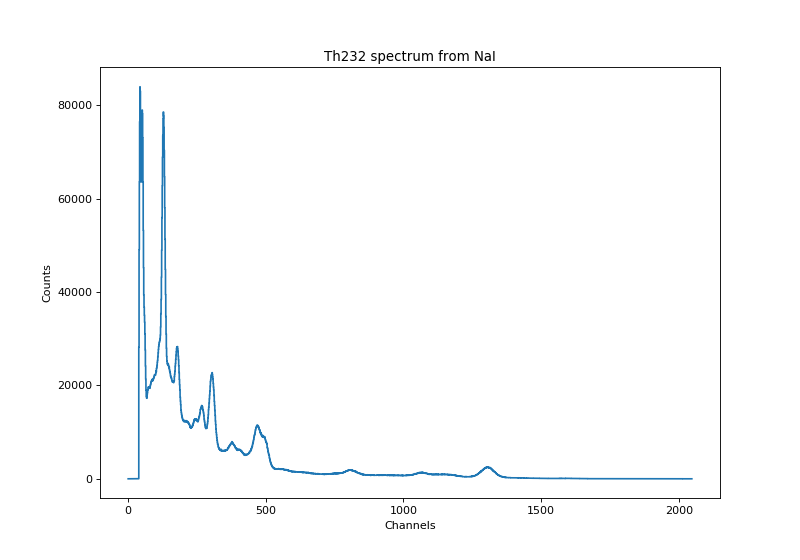

Text(0, 0.5, 'Counts')

In [187]:
#Th232 NaI
plt.figure(figsize=(10,7))
# with the data read in with the first routine
plt.step(Th232_NaI.bin_centers, Th232_NaI.counts, where='mid')
plt.title("Th232 spectrum from NaI") # set title of the plot
plt.xlabel("Channels")     # set label for x-axis 
plt.ylabel("Counts")       # set label for y-axis 
#plt.savefig("test_spectrum.png")

<IPython.core.display.Javascript object>


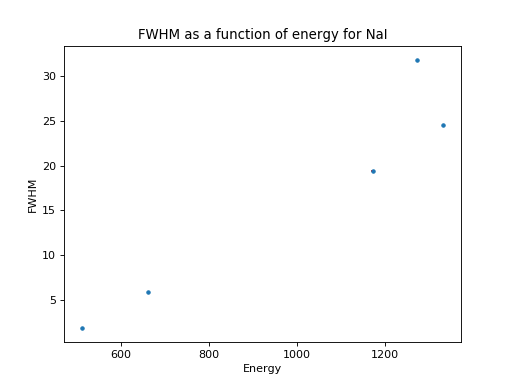

In [118]:
###FWHM versus energy for NaI

##FWHM as function of energy for NaI
### your code goes here 
f=2*((np.log(2)*2)**(1/2))
#FWHM= f*Na22Peak2NaI.sigma
FWHMlist1 = np.array([f*Co60Peak1NaI.sigma*k, f*Co60Peak2NaI.sigma*k, f*Cs137Peak1NaI.sigma*k, f*Na22Peak1NaI.sigma*k, f*Na22Peak2NaI.sigma*k])
energy = np.array([1173.228, 1332.492, 661.7, 511, 1274.5])
FWHMerror1 = np.array([f*Co60Peak1NaI.covar_matrix[2][2]*k, f*Co60Peak2NaI.covar_matrix[2][2]*k, f*Cs137Peak1NaI.covar_matrix[2][2]*k, f*Na22Peak1NaI.covar_matrix[2][2]*k, f*Na22Peak2NaI.covar_matrix[2][2]*k])

plt.figure()
plt.plot(energy, FWHMlist1, linestyle='', marker='.', label='data points')
plt.errorbar(energy, FWHMlist1, xerr=FWHMerror1, fmt='none', ecolor='red')
#plt.legend(loc='upper left')
plt.title("FWHM as a function of energy for NaI") # set title of the plot
plt.xlabel("Energy")     # set label for x-axis 
plt.ylabel("FWHM")       # set label for y-axis 
plt.show()


#f=2*((np.log(2)*2)**(1/2))
#FWHM= f*Na22Peak2NaI.sigma
#FWHMlist1 = np.array([f*Co60Peak1Ge.sigma*k+m, f*Co60Peak2Ge.sigma*k1+m, f*Cs137Peak1Ge.sigma*k+m, f*Na22Peak1Ge.sigma*k+m, f*Na22Peak2Ge.sigma*k+m])
#energy = np.array([1173.228, 1332.492, 661.7, 511, 1274.5])
#FWHMerror1 = np.array([f*Co60Peak1Ge.covar_matrix[2][2]*k, f*Co60Peak2Ge.covar_matrix[2][2]*k, f*Cs137Peak1Ge.covar_matrix[2][2]*k, f*Na22Peak1Ge.covar_matrix[2][2]*k, f*Na22Peak2Ge.covar_matrix[2][2]*k])


## Task 2: Energy calibration of the NaI(Tl) and HPGe detectors <a name="calibration"></a>

<IPython.core.display.Javascript object>


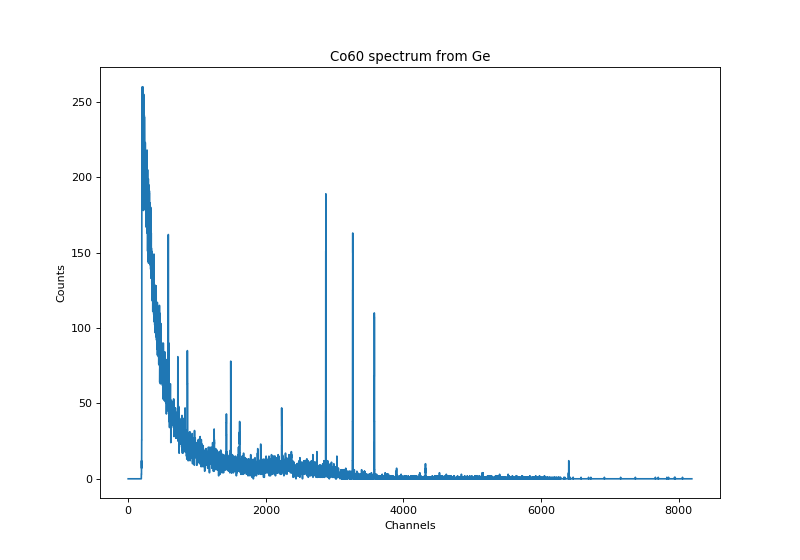

Text(0, 0.5, 'Counts')

In [188]:
### your code goes here 
### Co60 Ge

plt.figure(figsize=(10,7))
# with the data read in with the first routine
plt.step(Co60_Ge.bin_centers, Co60_Ge.counts, where='mid')

plt.title("Co60 spectrum from Ge") # set title of the plot
plt.xlabel("Channels")     # set label for x-axis 
plt.ylabel("Counts")       # set label for y-axis 
#plt.savefig("test_spectrum.png") # This is how you save the figure. Change the extension for different file types such as pdf or png.

<IPython.core.display.Javascript object>


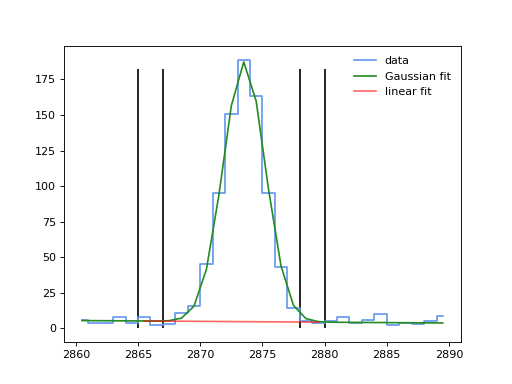

Estimated parameters:
 A = 182.65895, mu = 2873.53177,  sigma = 1.69108 

Uncertainties in the estimated parameters: 
 σ²(A) = 3.89800, σ²(mu) = 0.00045, σ²(sigma) = 0.00045 

Covariance matrix: 
 [[ 3.89799990e+00  6.09341288e-07 -2.40587622e-02]
 [ 6.09341288e-07  4.45477733e-04 -5.64285481e-09]
 [-2.40587622e-02 -5.64285481e-09  4.45477730e-04]]


<IPython.core.display.Javascript object>


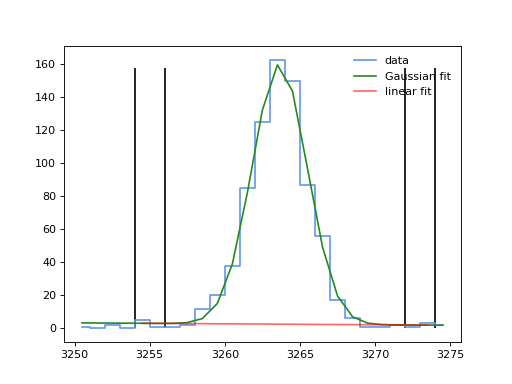

Estimated parameters:
 A = 157.68716, mu = 3263.64461,  sigma = 1.83434 

Uncertainties in the estimated parameters: 
 σ²(A) = 7.82741, σ²(mu) = 0.00141, σ²(sigma) = 0.00141 

Covariance matrix: 
 [[ 7.82741025e+00  1.60924395e-06 -6.07028355e-02]
 [ 1.60924395e-06  1.41228101e-03 -1.87159968e-08]
 [-6.07028355e-02 -1.87159968e-08  1.41228101e-03]]
Varibles stored in Co60peak1Ge: A=182.65895, mu=2873.53177 and sigma=1.69108
Estimated parameters:
 A = 182.65895, mu = 2873.53177,  sigma = 1.69108 

Uncertainties in the estimated parameters: 
 σ²(A) = 3.89800, σ²(mu) = 0.00045, σ²(sigma) = 0.00045 

Covariance matrix: 
 [[ 3.89799990e+00  6.09341288e-07 -2.40587622e-02]
 [ 6.09341288e-07  4.45477733e-04 -5.64285481e-09]
 [-2.40587622e-02 -5.64285481e-09  4.45477730e-04]]
Varibles stored in Co60peak2Ge: A=157.68716, mu=3263.64461 and sigma=1.83434
Estimated parameters:
 A = 182.65895, mu = 2873.53177,  sigma = 1.69108 

Uncertainties in the estimated parameters: 
 σ²(A) = 3.89800, σ²(mu) =

In [48]:


Co60Peak1Ge = fittingFunctions.perform_Gaussian_fit(x = Co60_Ge.bin_centers, 
                                              y = Co60_Ge.counts,                                                                                                                                       
                                              # region to use
                                              region_start = 2860, 
                                              region_stop = 2890,
                                              # initial guesses
                                              mu_guess = 2873.5, 
                                              A_guess = 190, 
                                              sigma_guess = 2,
                                              # regions for linear background fitting/subtraction:
                                              left_selection = [2865, 2867], 
                                              right_selection = [2878, 2880]) 


Co60Peak2Ge = fittingFunctions.perform_Gaussian_fit(x = Co60_Ge.bin_centers, 
                                              y = Co60_Ge.counts,                                                                                       
                                              # region to use
                                              region_start = 3250, 
                                              region_stop = 3275 ,
                                              # initial guesses
                                              mu_guess = 3263, 
                                              A_guess = 162, 
                                              sigma_guess = 2,
                                              # regions for linear background fitting/subtraction:
                                              left_selection = [3254, 3256], 
                                              right_selection = [3272, 3274]) 


print("Varibles stored in Co60peak1Ge: A={:.5f}, mu={:.5f} and sigma={:.5f}".format(Co60Peak1Ge.A, Co60Peak1Ge.mu, Co60Peak1Ge.sigma))

Co60Peak1Ge.print_full_info()

print("Varibles stored in Co60peak2Ge: A={:.5f}, mu={:.5f} and sigma={:.5f}".format(Co60Peak2Ge.A, Co60Peak2Ge.mu, Co60Peak2Ge.sigma))

Co60Peak1Ge.print_full_info()




<IPython.core.display.Javascript object>


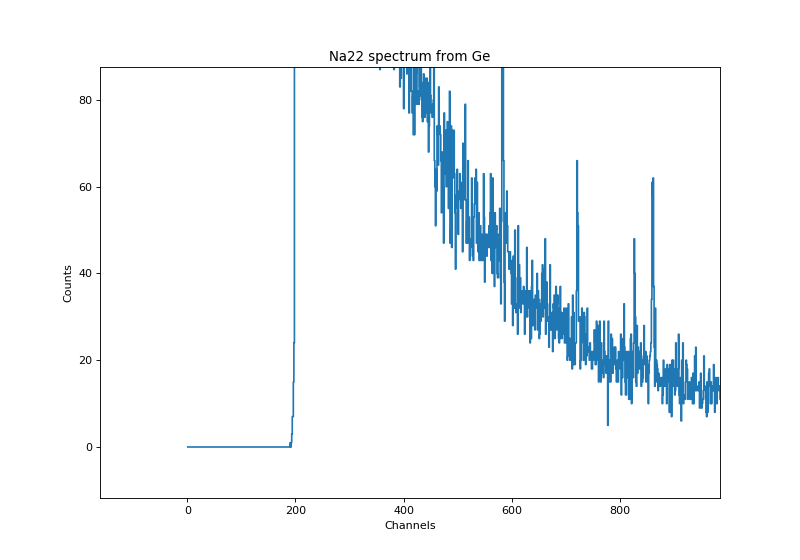

Text(0, 0.5, 'Counts')

In [189]:
#Na22
plt.figure(figsize=(10,7))
# with the data read in with the first routine
plt.step(Na22_Ge.bin_centers, Na22_Ge.counts, where='mid')

plt.title("Na22 spectrum from Ge") # set title of the plot
plt.xlabel("Channels")     # set label for x-axis 
plt.ylabel("Counts")       # set label for y-axis 
#plt.savefig("test_spectrum.png")

<IPython.core.display.Javascript object>


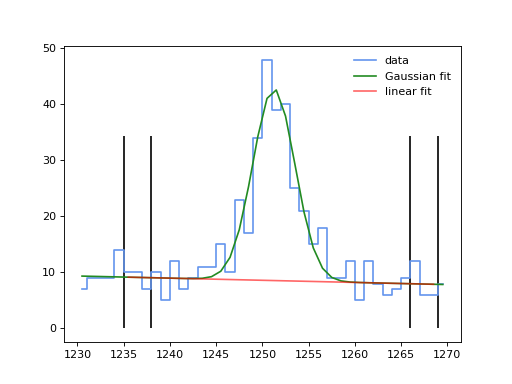

Estimated parameters:
 A = 34.26269, mu = 1251.24052,  sigma = 2.28148 

Uncertainties in the estimated parameters: 
 σ²(A) = 4.08325, σ²(mu) = 0.02414, σ²(sigma) = 0.02414 

Covariance matrix: 
 [[ 4.08325452e+00  1.48102748e-06 -1.81258689e-01]
 [ 1.48102748e-06  2.41386222e-02 -9.85624098e-08]
 [-1.81258689e-01 -9.85624098e-08  2.41386221e-02]]


<IPython.core.display.Javascript object>


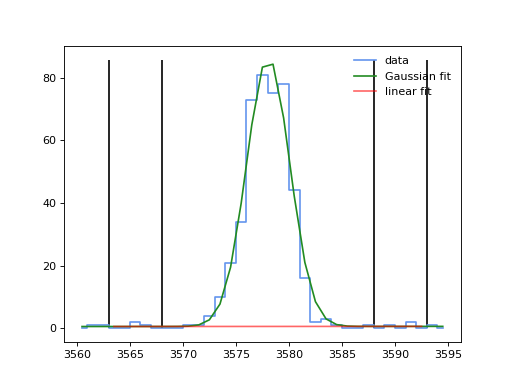

Estimated parameters:
 A = 85.79644, mu = 3578.04685,  sigma = 2.03896 

Uncertainties in the estimated parameters: 
 σ²(A) = 5.18123, σ²(mu) = 0.00390, σ²(sigma) = 0.00390 

Covariance matrix: 
 [[ 5.18123385e+00  2.14640063e-06 -8.20866386e-02]
 [ 2.14640063e-06  3.90151266e-03 -5.10007645e-08]
 [-8.20866386e-02 -5.10007645e-08  3.90151258e-03]]
Varibles stored in Na22peak1Ge: A=34.26269, mu=1251.24052 and sigma=2.28148
Estimated parameters:
 A = 34.26269, mu = 1251.24052,  sigma = 2.28148 

Uncertainties in the estimated parameters: 
 σ²(A) = 4.08325, σ²(mu) = 0.02414, σ²(sigma) = 0.02414 

Covariance matrix: 
 [[ 4.08325452e+00  1.48102748e-06 -1.81258689e-01]
 [ 1.48102748e-06  2.41386222e-02 -9.85624098e-08]
 [-1.81258689e-01 -9.85624098e-08  2.41386221e-02]]
Varibles stored in Na22peak2Ge: A=85.79644, mu=3578.04685 and sigma=2.03896
Estimated parameters:
 A = 85.79644, mu = 3578.04685,  sigma = 2.03896 

Uncertainties in the estimated parameters: 
 σ²(A) = 5.18123, σ²(mu) = 0.00

In [51]:
Na22Peak1Ge = fittingFunctions.perform_Gaussian_fit(x = Na22_Ge.bin_centers, 
                                              y = Na22_Ge.counts,
                                              # region to use
                                              region_start = 1230, 
                                              region_stop = 1270,
                                              # initial guesses
                                              mu_guess = 1245, 
                                              A_guess = 47, 
                                              sigma_guess = 2,
                                              # regions for linear background fitting/subtraction:
                                              left_selection = [1235, 1238], 
                                              right_selection = [1266, 1269]) 


Na22Peak2Ge = fittingFunctions.perform_Gaussian_fit(x = Na22_Ge.bin_centers, 
                                              y = Na22_Ge.counts,
                                              # region to use
                                              region_start = 3560, 
                                              region_stop = 3595 ,
                                              # initial guesses
                                              mu_guess = 3578, 
                                              A_guess = 80, 
                                              sigma_guess = 2,
                                              # regions for linear background fitting/subtraction:
                                              left_selection = [3563, 3568], 
                                              right_selection = [3588, 3593]) 


print("Varibles stored in Na22peak1Ge: A={:.5f}, mu={:.5f} and sigma={:.5f}".format(Na22Peak1Ge.A, Na22Peak1Ge.mu, Na22Peak1Ge.sigma))

Na22Peak1Ge.print_full_info()

print("Varibles stored in Na22peak2Ge: A={:.5f}, mu={:.5f} and sigma={:.5f}".format(Na22Peak2Ge.A, Na22Peak2Ge.mu, Na22Peak2Ge.sigma))

Na22Peak2Ge.print_full_info()



<IPython.core.display.Javascript object>


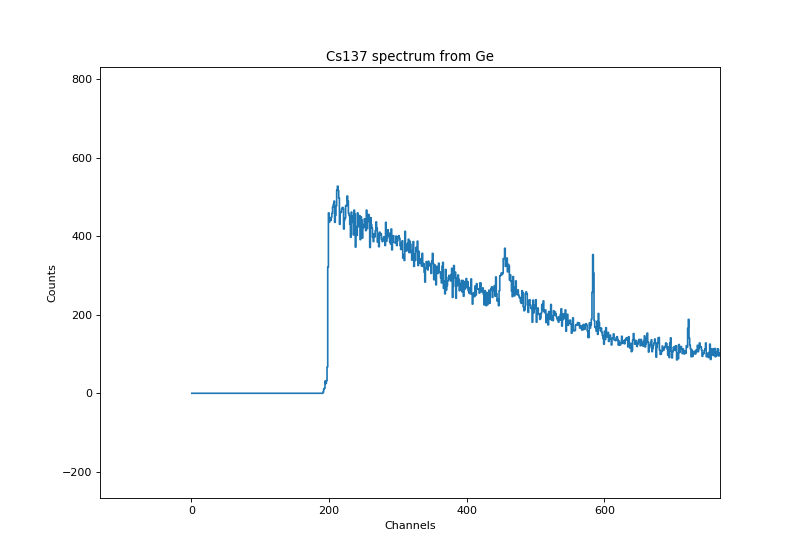

Text(0, 0.5, 'Counts')

In [191]:
#Cs137

plt.figure(figsize=(10,7))
# with the data read in with the first routine54
plt.step(Cs137_Ge.bin_centers, Cs137_Ge.counts, where='mid')

plt.title("Cs137 spectrum from Ge") # set title of the plot
plt.xlabel("Channels")     # set label for x-axis 
plt.ylabel("Counts")       # set label for y-axis 
#plt.savefig("test_spectrum.png") # This is how you save the figure. Change the extension for different file types such as pdf or png.




<IPython.core.display.Javascript object>


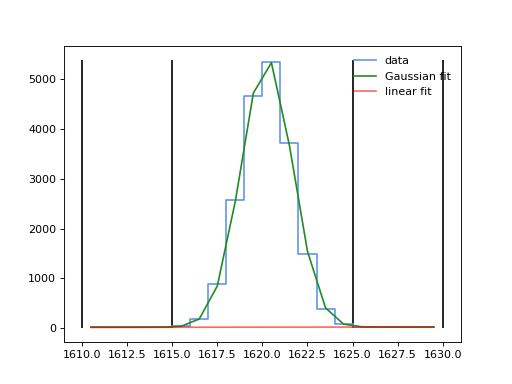

Estimated parameters:
 A = 5394.50510, mu = 1620.24425,  sigma = 1.41711 

Uncertainties in the estimated parameters: 
 σ²(A) = 419.47950, σ²(mu) = 0.00004, σ²(sigma) = 0.00004 

Covariance matrix: 
 [[ 4.19479498e+02  1.18757924e-06 -7.34632961e-02]
 [ 1.18757924e-06  3.85967952e-05 -2.96782172e-10]
 [-7.34632961e-02 -2.96782172e-10  3.85968001e-05]]
Varibles stored in Cs137peak1Ge: A=5394.50510, mu=1620.24425 and sigma=1.41711
Estimated parameters:
 A = 5394.50510, mu = 1620.24425,  sigma = 1.41711 

Uncertainties in the estimated parameters: 
 σ²(A) = 419.47950, σ²(mu) = 0.00004, σ²(sigma) = 0.00004 

Covariance matrix: 
 [[ 4.19479498e+02  1.18757924e-06 -7.34632961e-02]
 [ 1.18757924e-06  3.85967952e-05 -2.96782172e-10]
 [-7.34632961e-02 -2.96782172e-10  3.85968001e-05]]


In [49]:
Cs137Peak1Ge = fittingFunctions.perform_Gaussian_fit(x = Cs137_Ge.bin_centers, 
                                              y = Cs137_Ge.counts,
                                              # region to use
                                              region_start = 1610, 
                                              region_stop = 1630,
                                              # initial guesses
                                              mu_guess = 1620, 
                                              A_guess = 5000, 
                                              sigma_guess = 2,
                                              # regions for linear background fitting/subtraction:
                                              left_selection = [1610, 1615], 
                                              right_selection = [1625, 1630]) 


print("Varibles stored in Cs137peak1Ge: A={:.5f}, mu={:.5f} and sigma={:.5f}".format(Cs137Peak1Ge.A, Cs137Peak1Ge.mu, Cs137Peak1Ge.sigma))

Cs137Peak1Ge.print_full_info()


<IPython.core.display.Javascript object>


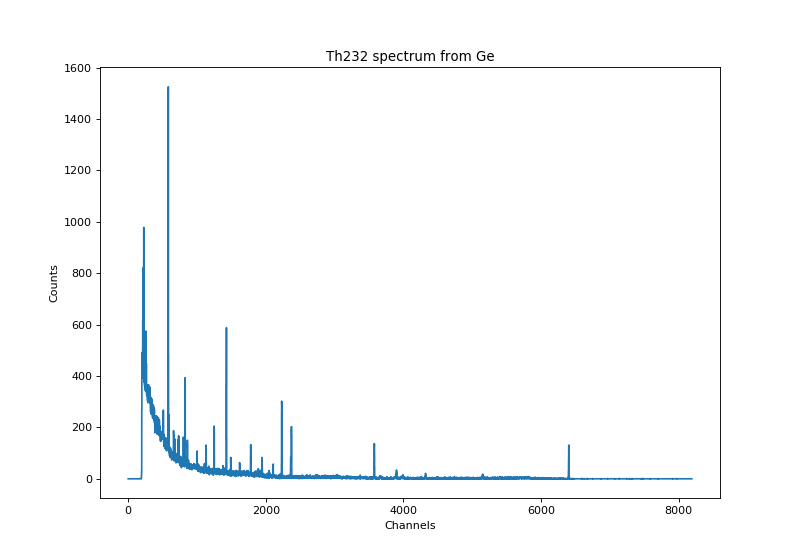

Text(0, 0.5, 'Counts')

In [152]:
plt.figure(figsize=(10,7))
# with the data read in with the first routine
plt.step(Th232_Ge.bin_centers, Th232_Ge.counts, where='mid')

plt.title("Th232 spectrum from Ge") # set title of the plot
plt.xlabel("Channels")     # set label for x-axis 
plt.ylabel("Counts")       # set label for y-axis 
#plt.savefig("test_spectrum.png")

Estimates of k = 0.41 and  m = 0.36


<IPython.core.display.Javascript object>


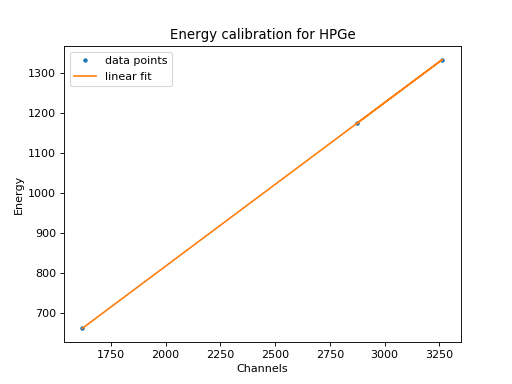

[1173.228 1332.492  661.7  ]
[2873.5317677  3263.64461498 1620.24425099]
[1.69107723 1.83433559 1.41710777]


In [153]:
#calibrating Ge
# we define the table energies as Numpy arrays, as these are easier to use in calculations than lists:
#energy = np.array([511,  661.7, 1173.228, 1274.5, 1332.492 ])
#channels = np.array([ Na22Peak1Ge.mu, Cs137Peak1Ge.mu, Co60Peak1Ge.mu,  Na22Peak2Ge.mu, Co60Peak2Ge.mu])
#channelerror = np.array([ Na22Peak1Ge.sigma, Cs137Peak1Ge.sigma, Co60Peak1Ge.sigma,  Na22Peak2Ge.sigma, Co60Peak2Ge.sigma])

energy = np.array([1173.228, 1332.492, 661.7])
channels = np.array([Co60Peak1Ge.mu, Co60Peak2Ge.mu, Cs137Peak1Ge.mu])
channelerror = np.array([Co60Peak1Ge.sigma, Co60Peak2Ge.sigma, Cs137Peak1Ge.sigma])
#channelerror = np.array([Co60Peak1Ge.covar_matrix[1][1], Co60Peak2Ge.covar_matrix[1][1], Cs137Peak1Ge.covar_matrix[1][1]])

### 1. define the data to fit
# see energy and channels in the cells above

### 2. the function
def LineFunc(x, k, m):
    return k*x+m

### 3. our intial guess 
guess = [2, # k
         1] # m

### 4. now we can perform the fit using curve_fit:
estimates, covar_matrix = curve_fit(LineFunc,
                                    channels,
                                    energy,
                                    p0 = guess)

k1 = estimates[0] # unpack our values 
m1 = estimates[1] # unpack our values 

print("Estimates of k = {:.2f} and  m = {:.2f}".format(k1, m1))

### Plot your Gaussian fit
plt.figure()
#plt.plot(channels, energy, linestyle="", marker="", label='data points')
plt.plot(channels, energy, linestyle="", marker=".", label='data points')
plt.plot(channels, LineFunc(channels, k1, m1), label='linear fit')
plt.errorbar(channels, energy, xerr=channelerror, fmt='none', ecolor='red')
plt.legend(loc='upper left')
plt.title("Energy calibration for HPGe") # set title of the plot
plt.xlabel("Channels")     # set label for x-axis 
plt.ylabel("Energy")       # set label for y-axis 
plt.show()

print(energy)
print(channels)
print(channelerror)



<IPython.core.display.Javascript object>


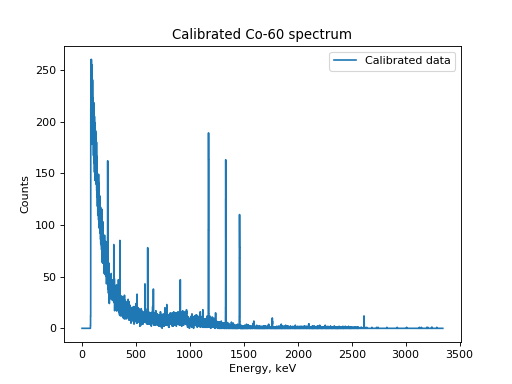

In [138]:
#Apply Calibration
Co60_Ge.calibrate(k1, m1) ### which means data.energy = data.bin_centers * k + m ,data= Co60_NaI

plt.figure()
# with the data read in with the first routine
plt.step(Co60_Ge.energy, Co60_Ge.counts, where='mid', label='Calibrated data')

plt.title("Calibrated Co-60 spectrum") # set title of the plot
plt.xlabel("Energy, keV")     # set label for x-axis 
plt.ylabel("Counts")          # set label for y-axis 
plt.legend()                  # enables legend for all plots with a 'label'
#plt.savefig("test_spectrum.png")

In [132]:
Th232_Ge.calibrate(k1, m1) ### which means data.energy = data.bin_centers * k + m ,data= Co60_NaI

plt.figure()
# with the data read in with the first routine
plt.step(Th232_Ge.energy, Th232_Ge.counts, where='mid', label='Calibrated data')

plt.title("Calibrated Th232 spectrum") # set title of the plot
plt.xlabel("Energy, keV")     # set label for x-axis 
plt.ylabel("Counts")          # set label for y-axis 
plt.legend()                  # enables legend for all plots with a 'label'
#plt.savefig("test_spectrum.png")

NameError: name 'k1' is not defined

<IPython.core.display.Javascript object>


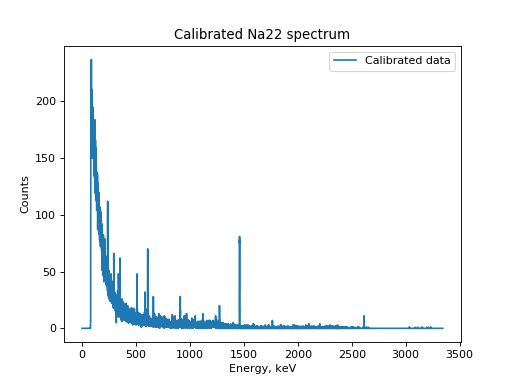

In [154]:
Na22_Ge.calibrate(k1, m1) ### which means data.energy = data.bin_centers * k + m ,data= Co60_NaI

plt.figure()
# with the data read in with the first routine
plt.step(Na22_Ge.energy, Na22_Ge.counts, where='mid', label='Calibrated data')

plt.title("Calibrated Na22 spectrum") # set title of the plot
plt.xlabel("Energy, keV")     # set label for x-axis 
plt.ylabel("Counts")          # set label for y-axis 
plt.legend()                  # enables legend for all plots with a 'label'
#plt.savefig("test_spectrum.png")

<IPython.core.display.Javascript object>


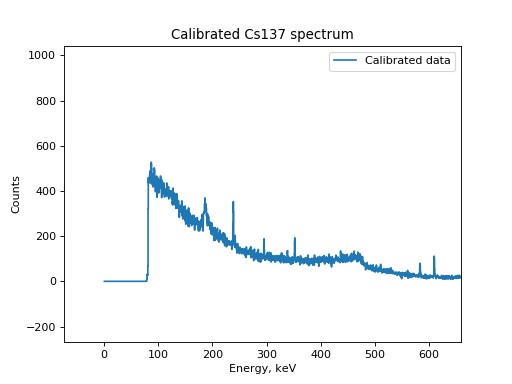

In [201]:
Cs137_Ge.calibrate(k1, m1) ### which means data.energy = data.bin_centers * k + m ,data= Co60_NaI

plt.figure()
# with the data read in with the first routine
plt.step(Cs137_Ge.energy, Cs137_Ge.counts, where='mid', label='Calibrated data')

plt.title("Calibrated Cs137 spectrum") # set title of the plot
plt.xlabel("Energy, keV")     # set label for x-axis 
plt.ylabel("Counts")          # set label for y-axis 
plt.legend()                  # enables legend for all plots with a 'label'
#plt.savefig("test_spectrum.png")

## Task 3: Full width at half maximum (FWHM) as a function of a $\gamma$-ray energy <a name="fwhm"></a>

<IPython.core.display.Javascript object>


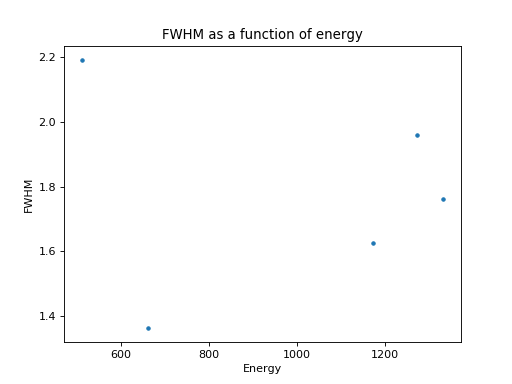

In [155]:
f=2*((np.log(2)*2)**(1/2))
#FWHM= f*Na22Peak2NaI.sigma
#FWHMlist = np.array([f*Co60Peak1Ge.sigma*k+m, f*Co60Peak2Ge.sigma*k+m, f*Cs137Peak1Ge.sigma*k+m, f*Na22Peak1Ge.sigma*k+m, f*Na22Peak2Ge.sigma*k+m])
#energy = np.array([1173.228, 1332.492, 661.7, 511, 1274.5])
#FWHMerror = np.array([f*Co60Peak1Ge.covar_matrix[2][2]*k+m, f*Co60Peak2Ge.covar_matrix[2][2]*k+m, f*Cs137Peak1Ge.covar_matrix[2][2]*k+m, f*Na22Peak1Ge.covar_matrix[2][2]*k+m, f*Na22Peak2Ge.covar_matrix[2][2]*k+m])


### your code goes here 
f=2*((np.log(2)*2)**(1/2))
#FWHM= f*Na22Peak2NaI.sigma
FWHMlist = np.array([f*Co60Peak1Ge.sigma*k1, f*Co60Peak2Ge.sigma*k1, f*Cs137Peak1Ge.sigma*k1, f*Na22Peak1Ge.sigma*k1, f*Na22Peak2Ge.sigma*k1])
energy = np.array([1173.228, 1332.492, 661.7, 511, 1274.5])
FWHMerror = np.array([f*Co60Peak1Ge.covar_matrix[2][2]*k1, f*Co60Peak2Ge.covar_matrix[2][2]*k1, f*Cs137Peak1Ge.covar_matrix[2][2]*k1, f*Na22Peak1Ge.covar_matrix[2][2]*k1, f*Na22Peak2Ge.covar_matrix[2][2]*k1])

plt.figure()
plt.plot(energy, FWHMlist, linestyle='', marker='.', label='data points')
plt.errorbar(energy, FWHMlist, xerr=FWHMerror, fmt='none', ecolor='red')
#plt.legend(loc='upper left')
plt.title("FWHM as a function of energy") # set title of the plot
plt.xlabel("Energy")     # set label for x-axis 
plt.ylabel("FWHM")       # set label for y-axis 
plt.show()



## Task 4: $^{22}$Na $\gamma$-spectrum and relative peak intensity <a name="na22"></a>

In [200]:
### your code goes here 
AreaNa22P1NaI = np.sqrt(2*np.pi)*Na22Peak1NaI.A*np.abs(Na22Peak1NaI.sigma)
print('Area of the first peak in Na22 from NaI is {:.2f}'.format(AreaNa22P1NaI))

AreaNa22P2NaI = np.sqrt(2*np.pi)*Na22Peak2NaI.A*np.abs(Na22Peak2NaI.sigma)
print('Area of the second peak in Na22 from NaI is {:.2f}'.format(AreaNa22P2NaI))

epbT5=0.58
epbT12=0.33
u5=0.04
u12=0.035
x=0.0762 #for both assumed
eeff5=(1-np.exp(-u5*0.0762))
eeff12=(1-np.exp(-u12*0.0762))

ratio512=(AreaNa22P1NaI* epbT12 *eeff12)/(AreaNa22P2NaI*epbT5*eeff5)

print(ratio512)

#error propagation
#this is too advanced for your level :(

#someerror = np.array([f*Co60Peak1Ge.covar_matrix[2][2]*k+m, f*Co60Peak2Ge.covar_matrix[2][2]*k+m, f*Cs137Peak1Ge.covar_matrix[2][2]*k+m, f*Na22Peak1Ge.covar_matrix[2][2]*k+m, f*Na22Peak2Ge.covar_matrix[2][2]*k+m])

s5=Na22Peak1NaI.covar_matrix[2][2]
s12=Na22Peak2NaI.covar_matrix[2][2]
#A5=np.sqrt(Na22Peak1NaI.covar_matrix[0][0])
#A12=np.sqrt(Na22Peak2NaI.covar_matrix[0][0])

relI5=(A5/Na22Peak1NaI.A)+(s5/Na22Peak1NaI.sigma)
relI12=(A12/Na22Peak2NaI.A)+(s5/Na22Peak2NaI.sigma)

errx=(np.sqrt(2*x**2)-x)/2

relmux5=(0.001/0.04)+(errx)/0.0762
relmux12=(0.001/0.035)+(errx)/0.0762

errmux5=(u5*x)*relmux5
errmux12=(u12*x)*relmux12

#erreff5=1-np.exp(-errmux5)
#erreff12= 1 -np.exp(-errmux12)

#releff5=erreff5/eeff5
#releff12= erreff12/eeff12

uepeff5=np.sqrt(((np.exp(-u5*x))**2)*(errmux5**2))
uepeff12=np.sqrt(((np.exp(-u12*x))**2)*(errmux12**2))

releff5= uepeff5/eeff5
releff12= uepeff12/eeff12

relepbt5=0.01/epbT5
relepbt12=0.01/epbT12

relratio=relI5+relI12+releff5+releff12+relepbt5+relepbt12

print(relratio)

errratio=ratio512*relratio
print(errratio, s5, s12, errx, relI5, relI12, relmux5, relmux12, relepbt5, relI5, releff5)
print(releff5)

Area of the first peak in Na22 from NaI is 2690273.14
Area of the second peak in Na22 from NaI is 642705.96
2.0843024729292976
0.5212012111032537
1.0863409731962566 0.0006145463217475957 0.005045824008082019 0.01578153672641492 0.0024292105103012928 0.004110288271044687 0.23210678118654748 0.23567820975797607 0.01724137931034483 0.0024292105103012928 0.23175323014720672
0.23175323014720672


In [213]:
#uncertainty for Task 4
p1=Na22Peak1NaI.A*0.15
p2=Na22Peak2NaI.A*0.15
A1=Na22Peak1NaI.A
A2=Na22Peak2NaI.A

relArea=np.sqrt((p1/A1)**2+(p2/A2)**2+(s5/Na22Peak1NaI.sigma)**2+(s12/Na22Peak2NaI.sigma)**2)

#s5=np.sqrt(Na22Peak1NaI.covar_matrix[2][2])
#s12=np.sqrt(Na22Peak2NaI.covar_matrix[2][2])


errratio512=ratio512*relArea

print(errratio512,relArea)



0.4422908886867827 0.21220091346203848


## Task 5: $^{137}$Cs and the internal conversion coefficient of $^{137}$Ba <a name="internal"></a>

In [157]:
### your code goes here 





## Task 6: Binding energy of the deuteron <a name="deuteron"></a>

<IPython.core.display.Javascript object>


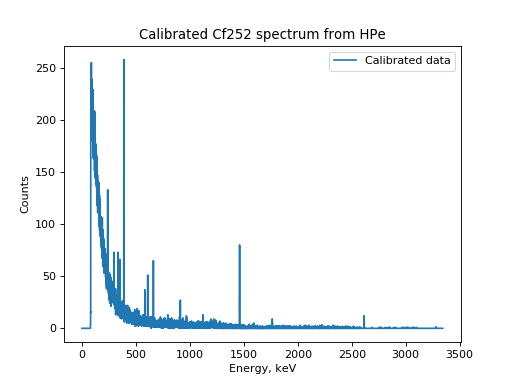

In [206]:
### your code goes here 
Cf252_Ge.calibrate(k1, m1) ### which means data.energy = data.bin_centers * k + m ,data= Co60_NaI

plt.figure()
# with the data read in with the first routine
plt.step(Cf252_Ge.energy, Cf252_Ge.counts, where='mid', label='Calibrated data')

plt.title("Calibrated Cf252 spectrum from HPe") # set title of the plot
plt.xlabel("Energy, keV")     # set label for x-axis 
plt.ylabel("Counts")          # set label for y-axis 
plt.legend()                  # enables legend for all plots with a 'label'
#plt.savefig("test_spectrum.png")




## Task 7: Background radiation <a name="background"></a>

The background spectrum that is to be analysed as a part of the lab is named
`background_analysis.csv` and can be found in the current folder. This spectrum
has been measured with another detector and is already calibrated. 

The spectrum can be read with the help of `MCA.py` as following:

In [93]:
background = MCA.load_calibrated_spectrum("Gamma_data/Background.txt")

<IPython.core.display.Javascript object>


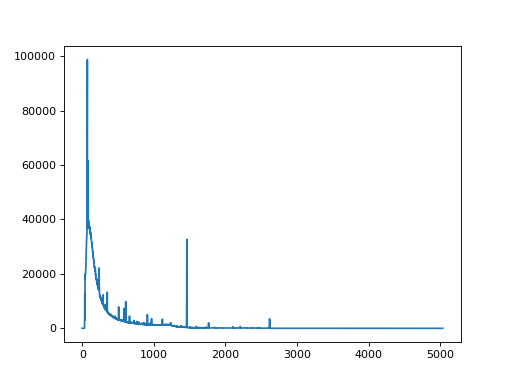

In [94]:
### your code goes here 
plt.figure()
# with the data read in with the first routine
plt.step(background.energy, background.counts, where='mid', label='Calibrated data')



In [193]:
200*k1+m1


81.99836347887202